In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [25]:
#Runge Kutta method for solving differential equations
#Input: d=dimension of the system of equations
#       f=vector field
#       (t0,y0)=initial condition
#       t_final= final time
#       N=number of steps
#Output:t=time grid, y=approximate solution 
def RK4(d,f,t0,y0,t_final,N):
    t=np.zeros(N+1)
    y=np.zeros((N+1,d))
    h=(t_final-t0)/N
    #print(h)
    t[0]=t0
    y[0]=y0
    for i in range(N):
        t[i+1]=t[i]+h
        s1=f(t[i],y[i])
        s2=f(t[i]+0.5*h,y[i]+0.5*h*s1)
        s3=f(t[i]+0.5*h,y[i]+0.5*h*s2)
        s4=f(t[i]+h,y[i]+h*s3)
        y[i+1]=y[i]+(h/6)*(s1+2*s2+2*s3+s4)
    return t, y 

In [26]:
def f(t,y):
    return t*y+t**3
def y_exact(t):
    return 3*np.exp(0.5*t**2)-t**2-2

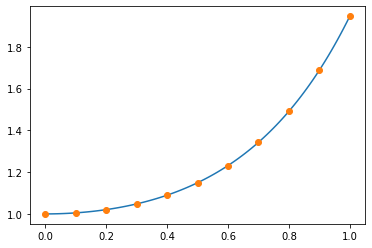

In [27]:
d=1;t0=0.;y0=1.;t_final=1.;N=10
t,y=RK4(d,f,t0,y0,t_final,N)
t_axis = np.linspace(t0, t_final, 100)
y_vals = y_exact(t_axis)
plt.plot(t_axis, y_vals)
plt.plot(t, y, 'o');

In [28]:
#Harmonic oscillator (mass-spring system)
def F(t,y):
    return np.array([y[1],-y[0]])

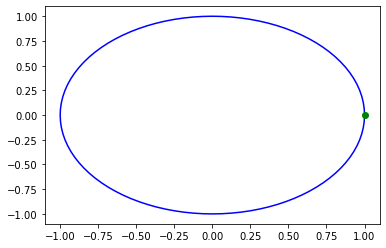

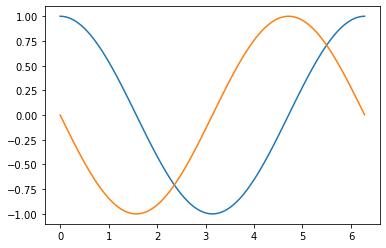

In [29]:
d=2;t0=0.;y0=np.array([1.,0]);t_final=6.28;N=100
t,y=RK4(d,F,t0,y0,t_final,N)
t_axis = np.linspace(t0, t_final, 100)
plt.plot(y[:,0],y[:,1], 'b-') #trajectory
plt.plot([y[0,0]], [y[0,1]], 'go') # start
plt.show()
plt.plot(t,y)
plt.show()

In [30]:
# Lorenz attractor
def L(t,y):
    s=10; r=28; b=8/3;
    return np.array([-s*y[0]+s*y[1],
                     -y[0]*y[2]+r*y[0]-y[1],
                     y[0]*y[1]-b*y[2]])

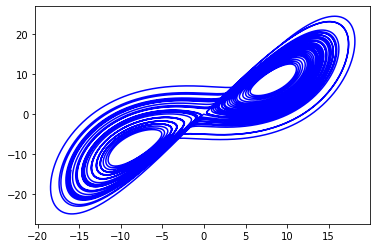

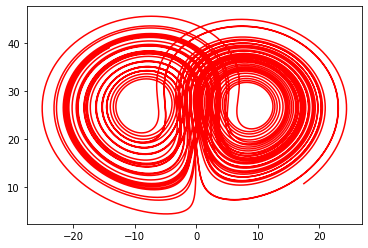

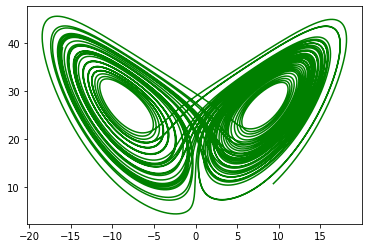

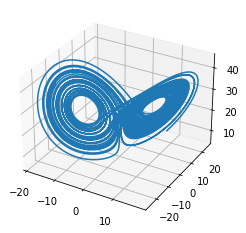

In [32]:
d=3;t0=0.;y0=np.array([5.,5., 5.]);t_final=50;N=50000
trans=100 #transients
t,y=RK4(d,L,t0,y0,t_final,N)
t_axis = np.linspace(t0, t_final, 100)
plt.plot(y[trans:,0],y[trans:,1], 'b-') #trajectory
plt.show()
plt.plot(y[trans:,1],y[trans:,2], 'r-') #trajectory
plt.show()
plt.plot(y[trans:,0],y[trans:,2], 'g-') #trajectory
plt.show()
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(y[trans:,0],y[trans:,1], y[trans:,2],)
plt.draw()
plt.show()

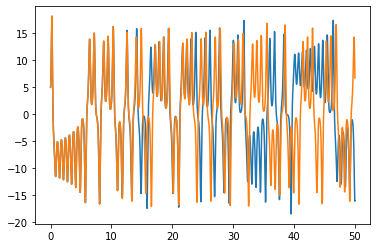

In [35]:
#Sensitive dependence on intital conditions
d=3;t0=0.;
y01=np.array([5.,5., 5.]);t_final=50;N=50000
y02=np.array([5.001,5., 5.]);t_final=50;N=50000
trans=100 #transients
t,y1=RK4(d,L,t0,y01,t_final,N)
t,y2=RK4(d,L,t0,y02,t_final,N)
plt.plot(t,y1[:,0])
plt.plot(t,y2[:,0])
plt.show()